# Machine learning

Purpose of this notebook is to practise machine learning algorithms.


Downloaded Iris data from Kaggle https://www.kaggle.com/datasets/uciml/iris
Dataset includes information of different iris species.

In [1]:
import pandas as pd

### File reading and data evaluation

Data is first investigated to see what kind of data is used and if there is any values or data types that need changing.

In [2]:
df = pd.read_csv("Iris.csv") # File reading
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Data preparing

Data has no null values or wrong data types so only the species column is changed for more simply one.

In [6]:
df = df.drop('Id', axis=1) # deleting the id column

In [7]:
y = []
for s in df['Species']:
    x = s.split("-")
    y.append(x[-1])
    
df['Species'] = y

### Data splitting

In [8]:
from sklearn.model_selection import train_test_split

y = df["Species"] # Target
x = df.drop('Species', axis=1) # Features

In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [10]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# data is split 75/25 for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

### Model training

Decission tree classifier is used

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

### Prediction and evaluation

In [13]:
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [14]:
predictions = model.predict(x_test)

In [15]:
model.score(x_test, y_test)

0.9210526315789473

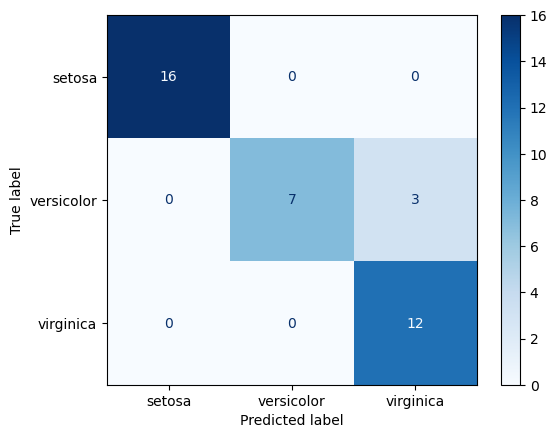

In [16]:
cm = confusion_matrix(y_test, predictions, labels = model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)

disp.plot(cmap = 'Blues')
plt.show()